# 1. Projeto II - Fundamentos Data Science I

## 1.1. Notas

Todas as analises aqui presentes são resultados do dataset disponibilizado pelo curso de Fundamentos de Data Science I da Udacity. Essas analises são feitas de forma descritiva, apenas para estudo e não devem ser considerados como resultados fieis, para tal devem serem feitas outras analises e recomenda-se a utilização do método baseados em deep learning para definir corretamente os valores faltantes, que podem ser oriundos de erros humanos.

- O dataset utilizado foi titanic-data-6.csv e sua versão editada titanic_edited.csv
- As [perguntas feitas](#12-perguntas-feitas) estão na seção seguinte.
- As informações sobre a limpeza dos dados estão na seção [1.3](#13-limpeza-dos-dados).
- As análises e resultados finais se encontram na seção [1.4](#14-analises).
- A seção [1.5](#15-conclusoes-e-resultados) contem as conclusões tiradas a partir do dataset.
- A seção [1.6](#16-limitações) contem informação sobre as limitações dos dados.
- A ultima seção [1.7](#16-links-uteis) contem links uteis de sites com informações que me ajudaram a completar o projeto.

## 1.2. Perguntas Feitas

- De que forma é composto o banco de dados. Quais são as classes das variáveis? Existem informações faltantes?
    + Para o tratamento dos dados e fazer a analise é necessário obter essas informações e saber a existem de valores discrepantes.

- Quais são as medidas descritivas? Qual é a contagem total para os dois gêneros? Qual é a contagem dos gêneros por classe? Como são distribuídos os passageiros por classe e por categoria de idade? Qual é a idade média dos passageiros por classe? Existem diferenças entre as idades médias dos passageiros por categoria de idade para cada classe?  Existem diferenças entre as categorias de idade? Qual foi o preço médio pago por passagem, por classe e por porto de embarcação?
    + Essas perguntas são importantes para analisar o perfil dos passageiros. Espera-se que existam diferenças significativas entre as classes, principalmente entre as classes extremas, primeira e terceira. É sabido que o Titanic foi de grande sucesso devido a propaganda luxuosa feita pela mídia e que essa fatídica viagem era a primeira com ele, devido a isso, espera-se que houvessem muitos passageiros da primeira classe embarcados.

- Será que mulheres e crianças possuem a maior taxa de sobrevivência no naufrágio? Por classe, qual foi a diferença de frequência da categoria de idade entre os sobreviventes e qual a relação disso pelo número total de passageiros, por classe e geral?
    + Como é esperado em acidentes, mulheres e crianças possuem preferencial no momento de fuga. Historicamente, sabe-se que muitos barcos de fuga foram lançados ao mar com pouquíssimas pessoas neles, portanto há interesse em saber se houve alguma diferença no número de sobreviventes entre cada classe e quantas pessoas sobreviveram no geral.

- A quantidade de adulto em cada classe?
    + Com a separação entre as três classes de passageiro e as categorias de idade, é possível investigar qual a probabilidade de se estar em qualquer uma das classes.

- A frequência de pessoas de diversas idades no Titanic e sua classe.

- A frequência de adultos em comparação as demais categorias de idade no barco.
    + A possibilidade de que existem mais adultos que as demais categorias é clara, mas e sua frequência em comparação as demais.

- Quais portos tem maior taxa de embarque e quais portos tem as menores taxas.
    + Agrupando as passagens, seus valores e o local de embarque é possível se ter a media dos portos que tiveram maior e menor taxa de embarque, como também a contagem de passageiros que cada porto recebeu no embarque do Titanic.

- Quais classes sociais tem os maiores números de pessoas por passagem.
    + Um agrupamento das passagens e contagem de nomes que fazem parte pode permitir descobrir quais passagens possuem uma maior quantidade de pessoas.

## 1.3. Limpeza dos dados

O programa responsável por fazer a limpeza dos dados é o arquivo `titanic_dataset_edit.py`, ele é responsável por fazer a maioria das modificações. Algumas modificações o programa não irá fazer pois foi necessário manter os dados no estado correto.

- Primeiro o programa apresenta as colunas, seus tipos e quantidade de dados que cada coluna possui. Com isso podemos analisar colunas com valores faltantes e colunas que não irão ser uteis para o projeto;
- Em seguida e verificada quantos itens únicos cada coluna tem;
- As colunas `PassengerId` e `Cabin` são removidas. A primeira contém apenas um índice que já é gerado ao se carregar o csv, a segunda tem apenas o código de cada cabine onde o passageiro dormiu e não é útil para as analises;
- A coluna `Pclass` é renomeada para `passenger_class` para melhorar a visualização, demais nomes são mantidos;
- Todas as colunas são renomeadas para ficaram em letras em minúsculo e alterar a separação entre palavras para sublinhado. Em seguida os nomes são revisados para verificar se estão corretos;
- É contado quantos valores de idade nulos existem por classe de passagem, é feito o calculo da média e aplicada a esses valores em branco para terem uma estimativa da idade;
- É criada uma nova coluna com a categoria da idade de cada passageiro, sendo: `Crianças` para pessoas com menos de 12 anos, `Adolescente` para pessoas com mais de 12 anos e menos de 18 anos e `Adulto` para todos que tiverem idade maior que 18 anos;
- Ao final é gerado um novo dataset contendo os registros editados.
- No programa que gera as tabelas, uma nova coluna temporária foi adiciona representando a frequência de indivíduos em uma passagem.

In [3]:
import numpy as np
import pandas as pd

""" Transformação do Data Set do Titanic oferencido no curso de fundamentos de
Data Science I (Udacity).
"""
df_titanic = pd.read_csv('titanic-data-6.csv')

Como é composto o banco de dados? Quais são as classes das variáveis? Existem informações faltantes?

In [4]:
print(df_titanic.head(1), '\n')
print(df_titanic.info(), '\n')
print(df_titanic.nunique(), '\n')

   PassengerId  Survived  Pclass                     Name   Sex     Age  \
0            1         0       3  Braund, Mr. Owen Harris  male 22.0000   

   SibSp  Parch     Ticket   Fare Cabin Embarked  
0      1      0  A/5 21171 7.2500   NaN        S   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
T

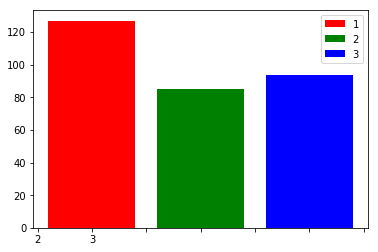

In [174]:
# Forçar plot das labels
# import matplotlib.pyplot as plt
# %matplotlib inline

# N = 3
# f_class = df_titanic.query('Survived == 1').groupby('Pclass')['Survived'].count()[1]
# s_class = df_titanic.query('Survived == 1').groupby('Pclass')['Survived'].count()[2]
# t_class = df_titanic.query('Survived == 1').groupby('Pclass')['Survived'].count()[3]
# ind = np.arange(N)
# width = 0.5

# fig, ax = plt.subplots()
# p1 = ax.bar(ind, [f_class, s_class, t_class], width, color=['r', 'g', 'b'])
# ax.set_xticks(ind + width/15.)
# ax.set_yticks(np.arange(0, max((f_class, s_class, t_class)), 10))
# ax.set_xticklabels(('1', '2', '3'))
# plt.legend((p1[0], p1[1], p1[2]), ('1', '2', '3'));

fig, ax = plt.subplots()
p1 = ax.bar([1,2,3], df_titanic.query('Survived == 1').groupby('Pclass')['Survived'].count(), color=('r','g', 'b'))
plt.legend((p1[0], p1[1], p1[2]), ('1', '2', '3'))

In [148]:
# temp = df_titanic.loc[(df_titanic['Sex'] == 'female')]
# temp.loc[df_titanic['Age'].isna()]['Age'].isna().sum()
# temp2 = temp.loc[df_titanic['Age'].isna()]
# temp.loc[df_titanic['Age'].isna(), 'Age'] = temp2.fillna(df_titanic.query('Sex == "female"')['Age'].mean().round())
# temp['Age'].isna().sum()
# df_titanic.loc[df_titanic['Age'].isna(), 'Age'] = temp
# print(df_titanic.loc[(df_titanic['Sex'] == 'female'), 'Age'].isna().sum())
# print(df_titanic.loc[(df_titanic['Sex'] == 'male'), 'Age'].isna().sum())

df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Age'].isna())] = df_titanic.query('Sex == "female"')['Age'].mean()
print(df_titanic.query('Sex == "female"')['Age'].isna().sum())
print(df_titanic.query('Sex == "male"')['Age'].isna().sum())

0
124


O banco de dados é composto de 12 colunas cujas variáveis são inteiras, strings e float. Exitem dados faltantes em pelo menos uma variável.

In [3]:
# Coluna de id de passageiros removida, pois é igual ao index.
# A coluna Cabines não será utilizada portanto será removida.
# Nome está sendo mantido apenas para estudo de parentesco. Isso auxiliará quando forem agrupados os 
# tickets e se retornar o nome das pessoas que possuem mesmo sobrenome é possível identificar se os 
# passageiros tinham relações de parentesco ou não.

# Para o tratamento dos dados serão feitas algumas alterações.
df_titanic.drop(columns=['PassengerId', 'Cabin'], inplace=True)

# Renomeia Pclass para Passenger Class.
df_titanic.rename(columns={'Pclass':'Passenger Class'}, inplace=True)

# Renomeia colunas.
def rename_cols(df:pd.DataFrame, sep:str='_', lowcase:bool=True):
    """ Renomeia as colunas em um DataFrame
    Utilizando de um separador, renomeia as colunas de um DataFrame
    
    :param df: DataFrame para renomear as colunas.
    :param sep: String com o caracter de separação das colunas.
    :param lowcase: Booleano para definir se os nomes devem ficar em minusculo.
    """
    if lowcase:
        df.rename(
            columns=lambda x: x.strip().lower().replace(' ', sep), inplace=True)
    else:
        df.rename(
            columns=lambda x: x.strip().replace(' ', sep), inplace=True)


rename_cols(df_titanic)
# Verifica se colunas foram alteradas corretamente
df_titanic.columns

Index(['survived', 'passenger_class', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

Identificação e tratamento das colunas que possuem dados faltantes.

In [4]:
# Contagem de valores nulos na coluna `embarked`.
print('Locais de embarque não definidos: {}'.format(df_titanic['embarked'].isnull().sum()))

# Contagem de locais de embarque: C (Cherbourg), Q (Queenstown) e S (Southampton).
print('Total de embarques em S (Southampton), Cherbourg (C) e Q (Queenstown).')
print(df_titanic['embarked'].value_counts())

embark_local = df_titanic['embarked'].value_counts().index.tolist()[0]
print('Local com maior número de embarques: {}'.format(embark_local))

# Valores nulos em embarked recebem o valor de maior contagem.
df_titanic['embarked'].fillna(embark_local, inplace=True)

Locais de embarque não definidos: 2
Total de embarques em S (Southampton), Cherbourg (C) e Q (Queenstown).
S    644
C    168
Q     77
Name: embarked, dtype: int64
Local com maior número de embarques: S


Identificação e tratamento das colunas que possuem dados faltantes por classe.

In [5]:
# Contagem de valores nulos na idade da primeira classe.
print('Pessoas da primeira classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 1')['age'].isnull().sum()))
df_mean_firstclass_age = df_titanic.query(
    'passenger_class == 1')['age'].dropna().mean()
# print(df_mean_firstclass_age)
df_titanic['age'].fillna(df_mean_firstclass_age, inplace=True)
# print(df_titanic.query('passenger_class == 1')['age'].isnull().sum())

# Contagem de valores nulos na idade da segunda classe.
print('Pessoas da segunda classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 2')['age'].isnull().sum()))
# df_mean_second_age = df_titanic.query(
# 'passenger_class == 2')['age'].dropna().mean()
# print(df_mean_second_age)
# df_titanic['age'].fillna(df_mean_second_age, inplace=True)
# print(df_titanic.query('passenger_class == 2')['age'].isnull().sum())

# Contagem de valores nulos na idade da terceira classe.
print('Pessoas da terceira classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 3')['age'].isnull().sum()))
# df_mean_third_age = df_titanic.query(
# 'passenger_class == 3')['age'].dropna().mean()
# print(df_mean_third_age)
# df_titanic['age'].fillna(df_mean_third_age, inplace=True)
# print(df_titanic.query('passenger_class == 3')['age'].isnull().sum())

Pessoas da primeira classe sem idade definida: 30
Pessoas da segunda classe sem idade definida: 0
Pessoas da terceira classe sem idade definida: 0


Transformação dos valores da coluna idade para inteiros. Crianças menores de um ano terão suas idades arredondadas para zero.

In [6]:
df_titanic['age'] = df_titanic['age'].apply(lambda x: np.floor(x)).astype(int)
df_titanic.head()

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


Qual o total de passageiros por tickets? Foi criada uma coluna adicional no banco de dados com essa informação.

In [7]:
# Cria coluna com frequencia dos tickets
df_titanic['freq'] = df_titanic.groupby('ticket')['ticket'].transform('count').astype(int)
df_titanic.head()

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,freq
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1


Identificou a necessidade de categorizar a idade dos passageiros por classes para auxílio na compreensão do perfil dos passageiros. Passageiros menores de 12 anos foram declarados serem crianças, passageiros de 13 até 18 anos foram considerados adolescentes e os demais foram considerados adultos.

In [8]:
# Cria nova coluna com categoria de idade.
# 
df_criancas = df_titanic.query('age <= 12').copy()
df_adolescente = df_titanic.query('12 < age <= 18').copy()
df_adulto = df_titanic.query('age > 18').copy()
df_sem_idade = df_titanic[df_titanic['age'].isnull()].copy()

idade_crianca = np.repeat('Criança', df_criancas.shape[0])
idade_adolescente = np.repeat('Adolescente', df_adolescente.shape[0])
idade_adulto = np.repeat('Adulto', df_adulto.shape[0])
idade_desconhecido = np.repeat('Desconhecido', df_sem_idade.shape[0])

df_criancas['age_category'] = idade_crianca
df_adolescente['age_category'] = idade_adolescente
df_adulto['age_category'] = idade_adulto
df_sem_idade['age_category'] = idade_desconhecido

df_titanic_edited = df_criancas.append(
    [df_adolescente, df_adulto, df_sem_idade])
df_titanic_edited.sort_index(inplace=True)

Novo arquivo gerado após as modificações.

In [9]:
df_titanic_edited.to_csv('titanic_edited.csv', index=False)

## 1.4. Analises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

""" Geração de tabelas e gráficos e outros elementos usando do Data Set do Titanic editado
oferencido no curso de fundamentos de Data Science I (Udacity).
"""

# Algumas analises não foram feitas devido a ausência de observações no banco de dados, 
# onde poderiamos verificar as informação familiares pelas colunas SibSp e Parch,
# existem informações de pessoas com acompanhantes mas não existem estes acompa-
# nhantes no banco de dados.

# Formata os ponto flutuantes para quatro casas decimais.
pd.set_option('display.float_format', '{:.4f}'.format)

df_titanic = pd.read_csv('titanic_edited.csv')
# Cabeçalho.
df_titanic.head(5)

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,freq,age_category
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Adulto
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1,Adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2,Adulto
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,Adulto


In [59]:
# df_titanic.loc[df_titanic['sex'] == np.nan, 'age'] = df_titanic.query('sex == "female"')['age'].mean()
# df_titanic.query('sex == "female"')['age'].isna().sum()
print(df_titanic.query('sex == "male"')['age'].isna().sum())
print(df_titanic.query('sex == "female"')['age'].isna().sum())
# df_titanic.query('sex == "female"')['age'].fillna(df_titanic.query('sex == "female"')['age'].mean(), inplace=True)
# df_titanic.query('sex == "female"')['age'].isna().sum()
# df_titanic.query('sex == "male"')['age'].isna().sum()

0
0


In [51]:
# Nomes das colunas.
print('Colunas: ', *(x for x in df_titanic.columns[1:]), sep=' | ')

Colunas:  | passenger_class | name | sex | age | sibsp | parch | ticket | fare | embarked | freq | age_category


Qual o total de passageiros sobreviventes por categoria de idade e por classe?

In [12]:
# Tabela 1: Passageiros por classe social, total de indivíduos por categoria de
# idade e sobreviventes da categoria.
df_1 = df_titanic.query('survived == 1').groupby(
    ['passenger_class', 'age_category'])['survived'].count().reset_index()
class_sum = df_1['survived'].sum()
df_1.loc['total'] = np.array(['-','-',class_sum])
df_1['survived'] = df_1['survived'].astype(int)
df_1.to_csv('tables/t_1.csv', index=False)
print('Tabela 1: Passageiros por classe social, total de indivíduos por categoria de idade e sobreviventes da categoria.')
df_1

Tabela 1: Passageiros por classe social, total de indivíduos por categoria de idade e sobreviventes da categoria.


,passenger_class,age_category,survived
0,1,Adolescente,11
1,1,Adulto,122
2,1,Criança,3
3,2,Adolescente,6
4,2,Adulto,64
5,2,Criança,17
6,3,Adolescente,13
7,3,Adulto,86
8,3,Criança,20
total,-,-,342


A *Tabela 1* demonstra que a grande maioria dos sobreviventes do naufrágio do Titanic, em todas as classes de passageiros, são adultos, sendo a grande maioria pertencentes a primeira classe. Esses dados consideram que 30 pessoas não identificadas da primeira classe são da categoria adulta, por intermédio da substituição dos Nas pela de média entre a quantidade de passageiros dessa classe. Ainda sabemos que o total desses sobreviventes somam 342 passageiros.

Qual o total de passageiros sobreviventes por categoria de idade e por classe?

/home/trprado/.local/share/virtualenvs/udacity-WaEjM5--/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


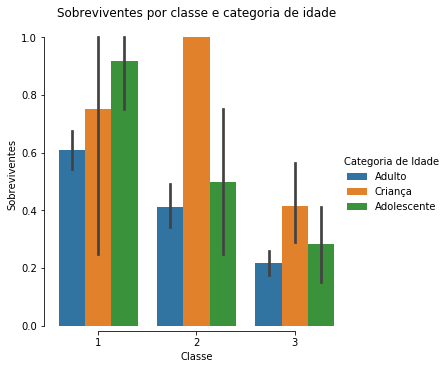

In [13]:
# Gráfico de Sobreviventes por classe e categoria de idade.
# Existe um warning nesse gráfico, mas não entendi como resolver.
g1 = sns.catplot(data=df_titanic, x='passenger_class', y='survived',
    kind='bar', hue='age_category')
g1._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por classe e categoria de idade')
sns.despine(offset=5, trim=True)
g1.savefig('imgs/g1-survived-class-by-age-cotegory.png')


A *Figura 1* ajuda a esclarecer visualmente a porcentagem de sobreviventes entre cada categoria e sua classe de passageiro. Por ela pode-se verificar claramente que a grande maioria dos sobreviventes são da primeira classe, sendo que na segunda classe quase todas as crianças sobreviveram.

Qual o total de passageiros por classe e categoria de idade?

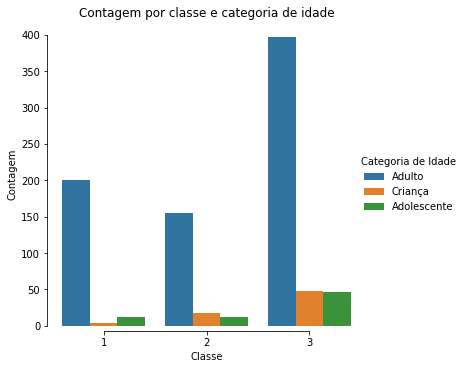

In [14]:
# Gráfico de contagem de passageiros por classe e categoria de idade.
g2 = sns.catplot(data=df_titanic, x='passenger_class',
    kind='count', hue='age_category')
g2._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem por classe e categoria de idade')
sns.despine(offset=5, trim=True)
g2.savefig('imgs/g2-count-class-by-age-cotegory.png')

Na *Figura 2* observa-se que a população de passageiros era constituída, na maior parte, por adultos. Para todas as categorias de idade, observa-se maior discrepância de valores na terceira classe em relação as demais. Observa-se ainda que a população de crianças na primeira classe foi a menor entre as classes.

Graficamente, como é a descrição da categoria de idade por classe?

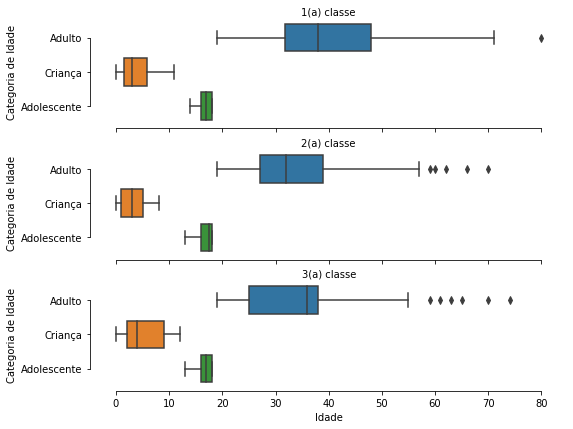

In [15]:
# Gráfico de caixa de categoria de idade por classe.
g3 = sns.catplot(y="age_category", x="age", row="passenger_class",
                 orient="h", height=2, aspect=4, kind="box",
                 data=df_titanic.query('age_category != "Desconhecido"'))
g3.set_ylabels('Categoria de Idade')
g3.set_xlabels('Idade')
g3.set_titles("{row_name}(a) classe")
sns.despine(offset=5, trim=True)
g3.savefig('imgs/g3-box-class-by-age-cotegory.png')

O mesmo é observado na *Figura 3*, com informações adicionais de que existem outliers na categoria adultos em todas as classes (*Figura 4*). Observa-se também que existe pouca variabilidade dentro das categorias, exceto para criança na primeira e terceira classe, adolescente na segunda classe e adultos na terceira classe.

Como os adultos constituem a maior parte da população de passageiros, como estão distribuídos sumariamente os adultos por classe? Existe muita diferença entre eles?

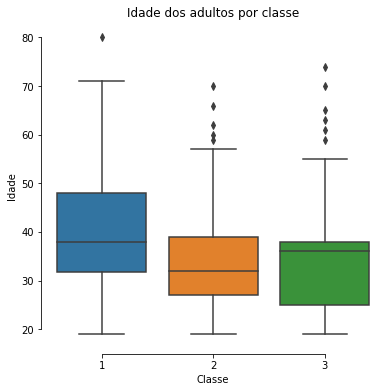

In [16]:
# Gráfico de caixa entre idade de passageiros adultos e classe social.
f, g8 = plt.subplots(figsize=(6, 6))
sns.boxplot(x="passenger_class", y="age",
            data=df_titanic.query('age_category != "Desconhecido" & age > 18'))
plt.ylabel('Idade')
plt.xlabel('Classe')
plt.title("Idade dos adultos por classe")
sns.despine(offset=5, trim=True);
g8.figure.savefig('imgs/g8-box-adult-age-by-social.png')

A *Figura 4* demonstra um gráfico de caixa com dados dos passageiros adultos em diferentes classes. É possível ver que existem outliers em todas as categorias. A mediana da idade dos adultos da terceira e primeira classe são próximas, assim como existe maior variabilidade nessas classes. A primeira classe é formada por pessoas mais velhas e a terceira por adultos com idades mais jovens. A segunda classe aparenta ser mais homogênea do que as demais.

Como é a distribuição das idades por classe?

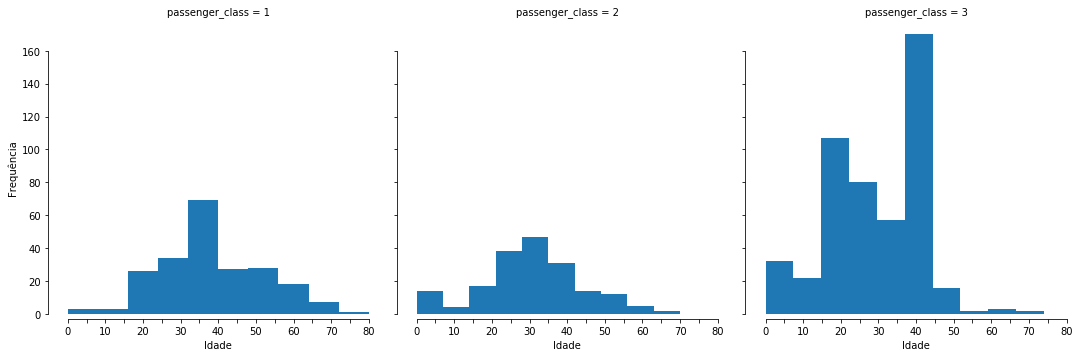

In [17]:
# Histograma idade por classe social

g = sns.FacetGrid(df_titanic_edited, col="passenger_class", height=5)
g.set_ylabels('Frequência')
g.map(plt.hist, "age")
g.set_ylabels('Frequência')
g.set_xlabels('Idade')
g.set(xticks=np.arange(0, 85, 5),
      xticklabels=['0', '', '10', '', '20', '', '30', '', 
                   '40', '', '50', '', '60', '', '70', '', '80'])
sns.despine(offset=5, trim=True);
g.savefig('imgs/g11-hist-age-first-to-third-class.png')

O primeiro gráfico de frequência na *Figura 5*, representando a primeira classe, apresenta uma distribuição simétrica e a maior frequência observada é de adultos com idade variando de 35 a 40 anos. No segundo e terceiro gráficos observam-se assimetrias positivas, sendo que no terceiro gráfico a maior frequência de idade varia de 40 a 45 anos e pertence a categoria adulta.

Como estão distribuídos os gêneros por classe?

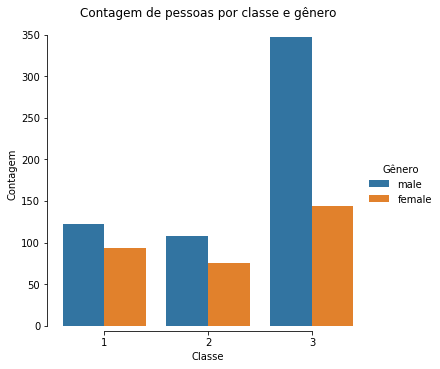

In [18]:
# Gráfico de contagem de passageiros por classe e gênero.
g4 = sns.catplot(data=df_titanic, x='passenger_class', kind='count', hue='sex')
g4._legend.set_title('Gênero')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por classe e gênero')
sns.despine(offset=5, trim=True)
g4.savefig('imgs/g4-count-passengers-class.png')

A *Figura 6* demonstra que a contagem de homens a bordo em todas as classes é maior que a de mulheres, independente da idade. Resalta-se a discrepância de passageiros do gênero masculino na terceira classe.

Qual o total de passageiros e sobreviventes por gênero e classe?

In [19]:
# Tabela 2: Passageiros por classe, total de indivíduos por sexo e
# sobrevivementes da categoria.
df_2 = df_titanic.groupby(['passenger_class', 'sex']).agg(
    {'name':'count', 'survived':'sum'}).rename(
    columns={'name':'total'})
df_2.to_csv('tables/t_2.csv')
print('Tabela 2: Passageiros por classe com total de indivíduos por classe e sobreviventes.')
df_2

Tabela 2: Passageiros por classe com total de indivíduos por classe e sobreviventes.


total  survived
passenger_class sex                    
1               female     94        91
                male      122        45
2               female     76        70
                male      108        17
3               female    144        72
                male      347        47

A *Tabela 2* mostra que existe mais homens e mulheres na terceira classe, como observado anteriormente na *Figuras 6*. A maioria dos sobreviventes são do gênero feminino, *Tabela 4*, sendo que a primeira e segunda classe quase todas as passageiras sobreviveram. Esses dados podem ser reafirmados pela *Figura 6*, que mostra a contagem de passageiros a bordo, com uma discrepância de passageiros do gênero masculino na terceira classe.

Qual o total de passageiros e sobreviventes por classe?

In [20]:
# Tabela 3: Contagem de passageiros por classe e sobreviventes.
df_3 = df_titanic.groupby('passenger_class').agg(
    {'name':'count', 'survived': 'sum'}).rename(
    columns={'name':'total'})
df_3.to_csv('tables/t_3.csv')
print('Tabela 3: Total de passageiros por classe e sobreviventes.')
df_3

Tabela 3: Total de passageiros por classe e sobreviventes.


,total,survived
passenger_class,,
1,216,136
2,184,87
3,491,119


A *Tabela 3* demonstra que a grande maioria dos passageiros constitue a terceira classe, sendo o dobro de passageiros da primeira classe, porém sobreviveu apenas, aproximadamente, 1/4 enquanto a primeira classe teve uma taxa de sobrevivência maior que 50%.

Graficamente, qual é a diferença do total de passageiros entre as classes?

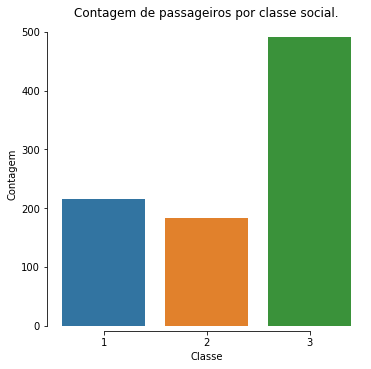

In [21]:
# Contagem de passageiros por classe.
g5 = sns.catplot(data=df_titanic, x='passenger_class', kind='count')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de passageiros por classe social.')
sns.despine(offset=5, trim=True)
g5.savefig('imgs/g5-count-passenger-class.png')

A *Figura 7* mostra o número de passageiros por classe. A classe com maior número de passageiros é a terceira classe, a segunda classe foi a que apresenta o menor número de passageiros.

Graficamente, qual a diferença numerica entre os gêneros?

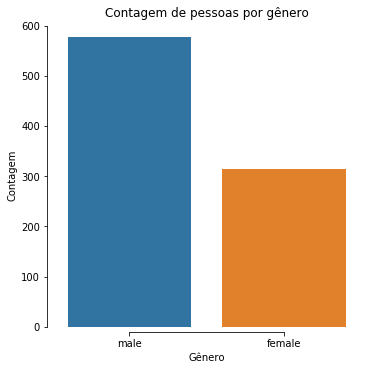

In [22]:
# Contagem de pessoas por gênero.
g6 = sns.catplot(data=df_titanic, x='sex', kind='count')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por gênero')
sns.despine(offset=5, trim=True)
g6.savefig('imgs/g6-count-people-by-gender.png')

Observa-se, na *Figura 8*, que a população de passageiros era formada, majoritariamente, por pessoas do gênero masculino, representando quase o dobro do número total de pessoas do gênero feminino. 

Qual era o total de sobreviventes por gênero?

In [23]:
# Tabela 4: Total de indivíduos por gênero e sobreviventes.
df_4 = df_titanic.groupby('sex').agg(
    {'name':'count', 'survived':'sum'}).rename(columns={'name':'total'})
df_4.to_csv('tables/t_4.csv')
print('Tabela 4: Total de indivíduos por gênero e sobreviventes.')
df_4

Tabela 4: Total de indivíduos por gênero e sobreviventes.


,total,survived
sex,,
female,314,233
male,577,109


A *Tabela 4* demonstra que os passageiros eram majoritariamente do gênero masculino, como também é observado na *Figura 8*, com maior sobrevivência de pessoas do gênero feminino. O que indica que mulheres tiveram uma maior taxa de sobrevivência comparado a homens, o que é esperado em um acidente dessas proporções.

Qual o total de sobreviventes por categoria de idade?

In [24]:
# Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.
df_5 = df_titanic.groupby('age_category').agg(
    {'name':'count', 'survived':'sum'}).rename(columns={'name':'total'})
df_5.to_csv('tables/t_5.csv')
print('Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.')
df_5

Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.


,total,survived
age_category,,
Adolescente,70,30
Adulto,752,272
Criança,69,40


A grande maioria dos passageiros era da categoria adulta, com a minoria sendo de crianças e adolescentes (*Figura 9*). Houve maior número de falecidos na categoria adulta, 63,83% e mais de 50% dos adolescentes faleceram no naufrágio. No total, 57,97% das crianças, 37,52% dos adultos e 42,86% dos adolescentes sobreviveram como pode ser observado na Tabela 5. Assim a maior taxa de sobrevivência não é de adultos e sim de crianças, com quase 58% de sobrevivência.

Graficamente, qual era a diferença entre as categorias de idade entre os passageiros?

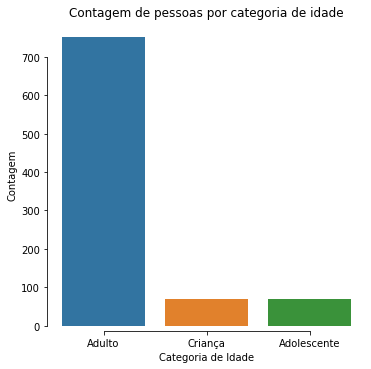

In [25]:
# Contagem de pessoas por categoria de idade.
g7 = sns.catplot(data=df_titanic, x='age_category', kind='count')
plt.xlabel('Categoria de Idade')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por categoria de idade')
sns.despine(offset=5, trim=True)
g7.savefig('imgs/g7-count-pearson-by-age-category.png')

A maioria dos passageiros eram adultos, *Figura 9*.

Como era o sumário da categoria de idade dos passageiros?

In [26]:
# Tabela 6: Descritiva da categoria de idade dos passageiros.
df_6 = df_titanic.groupby('age_category')['age'].describe().dropna()
df_6.to_csv('tables/t_6.csv')
print('Tabela 6: Descritiva da categoria de idade dos passageiros.')
df_6

Tabela 6: Descritiva da categoria de idade dos passageiros.


,count,mean,std,min,25%,50%,75%,max
age_category,,,,,,,,
Adolescente,70.0000,16.5714,1.4504,13.0000,16.0000,17.0000,18.0000,18.0000
Adulto,752.0000,35.1503,10.5975,19.0000,27.0000,36.0000,38.0000,80.0000
Criança,69.0000,4.6957,3.4865,0.0000,2.0000,4.0000,8.0000,12.0000


A *Tabela 6* mostra a descritiva das categorias de idade. No geral, a idade média dos adolescentes é de, aproximadamente, 17 anos (desvio de 1.44), mínimo de 13 anos e máximo de 18 anos; os adultos possuem, aproximadamente, 35 anos (desvio de 10.61), com mínimo de 19 anos e máximo de 80 anos; e as crianças possuem a idade média de, aproximadamente, 5 anos (desvio de 3.39), com o máximo de 12 anos.

Como era o sumário da categoria de idade dos passageiros por classe?

In [27]:
# Tabela 7: Descritiva da categoria de idade dos passageiros por classe.
df_7 = df_titanic.groupby(
    ['age_category', 'passenger_class'])['age'].describe().dropna()
df_7.to_csv('tables/t_7.csv')
print('Tabela 7: Descritiva da categoria de idade dos passageiros por classe.')
df_7

Tabela 7: Descritiva da categoria de idade dos passageiros por classe.


count    mean     std     min     25%     50%  \
age_category passenger_class                                                    
Adolescente  1                12.0000 16.6667  1.3027 14.0000 16.0000 17.0000   
             2                12.0000 16.7500  1.7123 13.0000 16.0000 17.5000   
             3                46.0000 16.5000  1.4414 13.0000 16.0000 17.0000   
Adulto       1               200.0000 40.1650 12.1894 19.0000 31.7500 38.0000   
             2               155.0000 34.3548 10.5945 19.0000 27.0000 32.0000   
             3               397.0000 32.9345  8.7635 19.0000 25.0000 36.0000   
Criança      1                 4.0000  4.2500  4.7871  0.0000  1.5000  3.0000   
             2                17.0000  3.3529  2.6912  0.0000  1.0000  3.0000   
             3                48.0000  5.2083  3.5667  0.0000  2.0000  4.0000   

                                 75%     max  
age_category passenger_class                  
Adolescente  1               18.0000 18.0000  
             2               18.0000 18.0000  
             3               18.0000 18.0000  
Adulto       1               48.0000 80.0000  
             2               39.0000 70.0000  
             3               38.0000 74.0000  
Criança      1                5.7500 11.0000  
             2                5.0000  8.0000  
             3                9.0000 12.0000

A *Tabela 7* separa a descritiva das categorias de idade entre as classes de passageiro, por ela é possível verificar que adultos da primeira classe são os mais velhos, com idade media de 40 anos, já adolescentes tem pouca variação na média de idade por classe, assim como na categoria infantil.

Como eram distribuídas as contagens de passageiros e as médias das passagens por classe e por porto de embarque?

In [28]:
# Tabela 8: Média de valor da passagem por local de embarque e sua classe.

df_8 = df_titanic.groupby(
    ['passenger_class', 'embarked']).agg(
    {'fare':'mean', 'name':'count'}).rename(
    columns={'fare':'fare_mean','name':'total'})
df_8.to_csv('tables/t_8.csv')
print('Tabela 8: Média de valor da passagem por local de embarque e sua classe:')
df_8

Tabela 8: Média de valor da passagem por local de embarque e sua classe:


fare_mean  total
passenger_class embarked                  
1               C          104.7185     85
                Q           90.0000      2
                S           70.5142    129
2               C           25.3583     17
                Q           12.3500      3
                S           20.3274    164
3               C           11.2141     66
                Q           11.1834     72
                S           14.6441    353

Na *Tabela 8* podemos ver uma separação dos valores médios das passagens em cada posto de embarque do Titanic. Sendo C (Cherbourg), Q (Queenstown) e S (Southampton). As passagens mais caras da primeira classe foram compradas em Cherbourg (*Figura 13*), totalizando 168 passageiros sendo a maioria da primeira classe (Figura 12), sendo que em Southampton apresentou um maior movimento de passageiros. Houve pouquíssimos embarques da primeira e segunda classe em Queenstown, cinco passageiros apenas.

In [29]:
fare_sum = df_titanic.iloc[df_titanic['ticket'].drop_duplicates().index].groupby('passenger_class')['fare'].sum()
print('Valor médio passagem primeira classe: {:.2f}'.format(
    fare_sum[1] / df_titanic.query('passenger_class == 1')['fare'].count()))
print('Valor médio passagem segunda classe: {:.2f}'.format(
    fare_sum[2] / df_titanic.query('passenger_class == 2')['fare'].count()))
print('Valor médio passagem terceira classe: {:.2f}'.format(
    fare_sum[3] / df_titanic.query('passenger_class == 3')['fare'].count()))

Valor médio passagem primeira classe: 43.65
Valor médio passagem segunda classe: 13.32
Valor médio passagem terceira classe: 8.09


Existem valores discrepantes entre as classes? Existe alguma diferença na distribuição monetária dos valores dos tickets entre as classes?

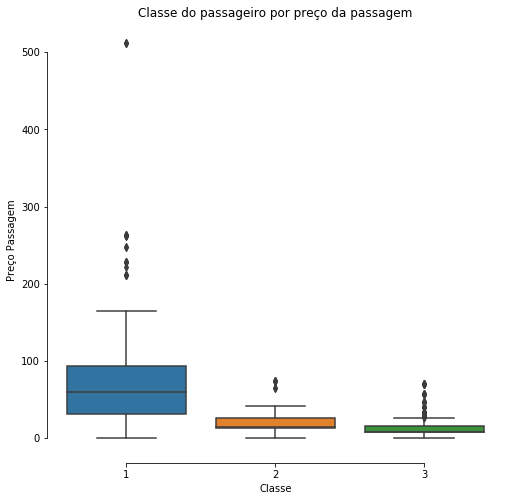

In [30]:
# Gráfico de caixa entre classe de passageiros e taxa da passagem.
f, g9 = plt.subplots(figsize=(8, 8))
sns.boxplot(x="passenger_class", y="fare", data=df_titanic)
plt.ylabel('Preço Passagem')
plt.xlabel('Classe')
plt.title("Classe do passageiro por preço da passagem")
sns.despine(offset=5, trim=True)
g9.figure.savefig('imgs/g9-box-class-by-ticket-fare.png')

Pela *Figura 10* pode-se observar que existem outliers com relação ao valor da passagem, como existem passagens com valores altos que permitiam entrada de mais de um passageiro. Como o banco de dados possuía dados faltantes, suspeita-se que esses outliers sejam de passagens que abrangem mais passageiros que não estavam contidos no dataset.

Em quais portos houve maior número de passageiros embarcando, por classe?

/home/trprado/.local/share/virtualenvs/udacity-WaEjM5--/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


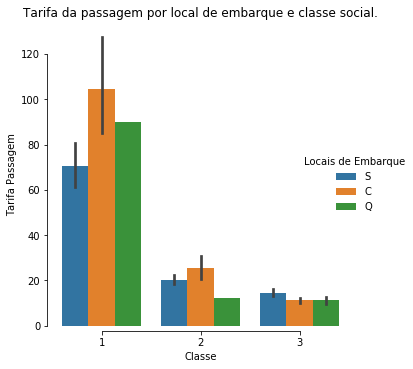

In [31]:
# Gráfico de barra com local de embarque e classe do passageiro.
g10 = sns.catplot(data=df_titanic, x='passenger_class',
    y='fare', kind='bar', hue='embarked')
g10._legend.set_title('Locais de Embarque')
plt.xlabel('Classe')
plt.ylabel('Tarifa Passagem')
plt.title('Tarifa da passagem por local de embarque e classe social.')
sns.despine(offset=5, trim=True)
g10.savefig('imgs/g10-bar-embarked-by-class.png')

A *Figura 11* contem a visualização da média das tarifas por classe, sendo C (Cherbourg), Q (Queenstown) e S (Southampton). Por ela podemos ver que as passagens em Cherbourg eram as que custavam mais caras tanto para a primeira quanto para a segunda classe. Em Queenstown o valor da passagem entre a terceira classe não tinha grande diferença de preço.

Qual ticket possui o maior número de passageiros por classe?

In [32]:
# Passagens com maior número de passageiros da primeira classe.
print('Tabela 9 - Passagens com maior número de passageiros da primeira classe:')
df_titanic_most_pc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 1').head(10)
df_titanic_most_pc.to_csv('tables/t_9.csv', index=False)
df_titanic_most_pc

Tabela 9 - Passagens com maior número de passageiros da primeira classe:


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,freq,age_category
380,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,C,4,Adulto
557,0,1,"Robbins, Mr. Victor",male,38,0,0,PC 17757,227.5250,C,4,Adulto
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C,4,Adolescente
716,1,1,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227.5250,C,4,Adulto
27,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,S,4,Adulto
88,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,S,4,Adulto
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0000,S,4,Adulto
438,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263.0000,S,4,Adulto
306,1,1,"Fleming, Miss. Margaret",female,38,0,0,17421,110.8833,C,4,Adulto
550,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C,4,Adolescente


In [33]:
# Passagens com maior número de passageiros da segunda classe.
print('Tabela 10 - Passagens com maior número de passageiros da segunda classe:')
df_titanic_most_sc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 2').head(10)
df_titanic_most_sc.to_csv('tables/t_10.csv', index=False)
df_titanic_most_sc

Tabela 10 - Passagens com maior número de passageiros da segunda classe:


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,freq,age_category
72,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5000,S,5,Adulto
120,0,2,"Hickman, Mr. Stanley George",male,21,2,0,S.O.C. 14879,73.5000,S,5,Adulto
385,0,2,"Davies, Mr. Charles Henry",male,18,0,0,S.O.C. 14879,73.5000,S,5,Adolescente
655,0,2,"Hickman, Mr. Leonard Mark",male,24,2,0,S.O.C. 14879,73.5000,S,5,Adulto
665,0,2,"Hickman, Mr. Lewis",male,32,2,0,S.O.C. 14879,73.5000,S,5,Adulto
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3,1,2,SC/Paris 2123,41.5792,C,3,Criança
608,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22,1,2,SC/Paris 2123,41.5792,C,3,Adulto
685,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25,1,2,SC/Paris 2123,41.5792,C,3,Adulto
314,0,2,"Hart, Mr. Benjamin",male,43,1,1,F.C.C. 13529,26.2500,S,3,Adulto
440,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45,1,1,F.C.C. 13529,26.2500,S,3,Adulto


In [34]:
# Passagens com maior número de passageiros da terceira classe.
print('Tabela 11 - Passagens com maior número de passageiros da terceira classe:')
df_titanic_most_tc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 3').head(10)
df_titanic_most_tc.to_csv('tables/t_11.csv', index=False)
df_titanic_most_tc

Tabela 11 - Passagens com maior número de passageiros da terceira classe:


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,freq,age_category
159,0,3,"Sage, Master. Thomas Henry",male,38,8,2,CA. 2343,69.5500,S,7,Adulto
180,0,3,"Sage, Miss. Constance Gladys",female,38,8,2,CA. 2343,69.5500,S,7,Adulto
201,0,3,"Sage, Mr. Frederick",male,38,8,2,CA. 2343,69.5500,S,7,Adulto
324,0,3,"Sage, Mr. George John Jr",male,38,8,2,CA. 2343,69.5500,S,7,Adulto
792,0,3,"Sage, Miss. Stella Anna",female,38,8,2,CA. 2343,69.5500,S,7,Adulto
846,0,3,"Sage, Mr. Douglas Bullen",male,38,8,2,CA. 2343,69.5500,S,7,Adulto
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,38,8,2,CA. 2343,69.5500,S,7,Adulto
13,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,S,7,Adulto
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2,4,2,347082,31.2750,S,7,Criança
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9,4,2,347082,31.2750,S,7,Criança


Nas *Tabelas 9 a 11* mostram as passagens com maior número de passageiros por classe. A primeira classe a passagem com o maior número de pessoas tem quatro, a grande maioria sobreviveu ao naufrágio. A terceira classe, possuíam mais de uma passagem com sete passageiros sendo que todos faleceram, porém em pesquisas online pelo nome de família consta que o banco de dados não contem todo o registro da família Sage, sendo que o total eram de 11 passageiros na mesma passagem.

Perfil das vítimas do naufrágio

Quantas pessoas foram vítimas por classe e categoria de idade?

In [35]:
# Tabela 12: Passageiros vítimas por classe social, total de indivíduos por categoria de idade.
df_12 = df_titanic.query('survived == 0').groupby(
    ['passenger_class', 'age_category'])['survived'].count().reset_index()
class_sum = df_12['survived'].sum()
df_12.loc['Total'] = np.array(['-','-',class_sum])
df_12['survived'] = df_12['survived'].astype(int)
df_12.to_csv('tables/t_12.csv')
print('Tabela 12: Passageiros vítimas por classe social, total de indivíduos por categoria de idade.')
df_12

Tabela 12: Passageiros vítimas por classe social, total de indivíduos por categoria de idade.


,passenger_class,age_category,survived
0,1,Adolescente,1
1,1,Adulto,78
2,1,Criança,1
3,2,Adolescente,6
4,2,Adulto,91
5,3,Adolescente,33
6,3,Adulto,311
7,3,Criança,28
Total,-,-,549


Observa-se na *Tabela 12* apenas uma criança e um adolescente não sobreviveram ao naufrágio, na primeira classe. Todos as crianças da segunda classe sobreviveram e, na terceira classe, 33 adolescentes e 28 crianças morreram. O maior número de mortes foi o da categoria de idade adulta pertencente a terceira classe com 311 ocorrências.

Quantas pessoas foram vítimas por gênero?

In [36]:
# Tabela 13: Total de vítimas por gênero
df_13 = df_titanic.query('survived == 0').groupby(['sex'])['survived'].count().reset_index()

df_13.to_csv('tables/t_13.csv')
print('Tabela 13: Total de vítimas por gênero.')
df_13

Tabela 13: Total de vítimas por gênero.


,sex,survived
0,female,81
1,male,468


O gênero masculino foi o qual obteve-se o maior número de óbtidos, 85.25%, o que era previsto visto que é o gênero que apresenta o maior número de observações e, também, o protocolo de fuga é que mulheres e crianças sejam evacuadas primeiro em acidentes.

Qual é a descrição da idade das pessoas que faleceram, por classe?

In [37]:
# Tabela 14: Descrição das vítimas por classe.
df_14 = df_titanic.query('survived == 0').groupby('passenger_class')['age'].describe()

df_14.to_csv('tables/t_14.csv')
print('Tabela 14: Descrição das vítimas por classe.')
df_14

Tabela 14: Descrição das vítimas por classe.


,count,mean,std,min,25%,50%,75%,max
passenger_class,,,,,,,,
1,80.0000,42.5500,13.8389,2.0000,36.7500,38.5000,51.2500,71.0000
2,97.0000,33.8557,11.7571,16.0000,25.0000,32.0000,38.0000,70.0000
3,372.0000,29.6747,11.6734,1.0000,21.0000,31.0000,38.0000,74.0000


A primeira classe teve, em média, a maior idade de aproximadamente, 43 anos (desvio de 13.83), sendo a vítima mais jovem com 2 anos e a mais velha com 71 anos. A segunda classe possui em média, aproximadamente, 34 anos (desvio de 11.75), com mínimo de 16 anos e máximo de 70 anos. E na terceira classe, o perfil da vítima é de passageiro com média de, aproximadamente, 30 anos (desvio de 11.67), com o mínimo de 1 ano e o máximo de 74 anos. 

Qual é a idade média da vítima do naufrágio?

In [38]:
# Tabela 15: Idade média dos falecidos.
df_15 = df_titanic.query('survived == 0')['age'].describe()

df_15.to_csv('tables/t_15.csv')
print('Tabela 15: Idade média dos falecidos.')
df_15

Tabela 15: Idade média dos falecidos.


count   549.0000
mean     32.2896
std      12.8267
min       1.0000
25%      23.0000
50%      34.0000
75%      38.0000
max      74.0000
Name: age, dtype: float64

A idade média da vítima era de, aproximadamente, 32 anos (desvio de 12,82) o que compreende a população adulta. A vítima mais jovem foi uma criança com 1 ano e a mais velha foi um adulto com 74 anos, ambos passageiros da terceira classe.

Qual era a idade média dos sobreviventes por classe?

In [39]:
# Tabela 16: Idade média de sobreviventes por classe.
df_16 = df_titanic.query('survived == 1').groupby('passenger_class')['age'].describe()

df_16.to_csv('tables/t_16.csv')
print('Tabela 16: Idade média de sobreviventes por classe.')
df_16

Tabela 16: Idade média de sobreviventes por classe.


,count,mean,std,min,25%,50%,75%,max
passenger_class,,,,,,,,
1,136.0000,35.6324,13.0701,0.0000,26.0000,36.0000,43.2500,80.0000
2,87.0000,26.4253,14.7567,0.0000,18.0000,28.0000,36.0000,62.0000
3,119.0000,25.5882,12.8541,0.0000,18.0000,27.0000,38.0000,63.0000


Existe diferenças entre as idades médias entre a primeira classe e as demais, o que era esperado visto que os passageiros da primeira classe eram mais velhos do que os passageiros das demais classes. Para a primeira classe, a média de idade era de, aproximadamente, 36 anos (desvio de 13 anos), o sobrevivente mais jovem possuia menos de 1 ano de idade, assim como para as demais classes, e o mais velho tinha 80 anos. Para a segunda classe, a idade média era de, aproximadamente, 26 anos (com desvio de 15 anos), o sobrevivente mais velho possuia 62 anos. Para a terceira classe, a média de idade, aproximadamente, igual da segunda classe e o sobrevivente mais velho possuia 63 anos.

Qual era a idade média dos sobreviventes?

In [40]:
# Tabela 17: Idade média dos sobreviventes.
df_17 = df_titanic.query('survived == 1')['age'].describe()

df_17.to_csv('tables/t_17.csv')
print('Tabela 17: Idade média dos sobreviventes.')
df_17

Tabela 17: Idade média dos sobreviventes.


count   342.0000
mean     29.7953
std      14.2262
min       0.0000
25%      21.0000
50%      31.0000
75%      38.0000
max      80.0000
Name: age, dtype: float64

A idade média do sobrevivente era de, aproximadamente, 30 anos (desvio de 14 anos) o que compreende a população adulta. O sobrevivente mais jovem foi uma criança com menos de 1 ano e a mais velha foi um adulto com 80 anos, sendo o mais velho passageiro da primeira classe.

## 1.5. Conclusões

A maioria dos passageiros do Titanic foram vítimas decorrentes do naufrágio. No total, apenas 57,97% das crianças, 37,52% dos adultos e 42,86% dos adolescentes sobreviveram. Sendo que a taxa de sobrevivência das crianças foi de 58%. Desses, 39,77% eram da primeira classe o que evidência que essa classe foi priorizada no momento de fuga, resultando em 62,96% de sobreviventes do total de passageiros da primeira classe. Em relação a segunda e terceira classes, sobreviveram apenas 47,28% e 24,24%, respectivamente, totalizando 60,23% de sobreviventes.

As crianças foram a que apresentaram maior taxa de sobrevivência, 57,97%, seguida dos adolescentes com 42,86% e adultos com 36,17%. Em relação ao gênero, 74,20% das mulheres sobreviveram e apenas 25,80% dos homens sobreviveram, sendo que eles constituiam majoritariamente a população de passageiros.

As passagens da primeira classe possuiam os maiores valores, em média $\$43.65$, e 	$\$13.32$, e $\$8.09$ em média para a segunda e terceira classe, respectivamente. Em relação ao local de embarque, houveram três portos em que o Titanic aportou, o Cherbourg, o Queenstown e o Southampton. No Cherbourg, embarcaram 168 pessoas no total, representando o porto em que obteve-se as maiores médias de tickets para a primeira e segunda classe, sendo 85 da primeira classe (com valor médio do ticket de $\$104,72$), 17 da segunda classe (com valor médio do ticket de $\$25,36$). O porto de Southampton foi o qual houve maior número de embarque, no total 646 pessoas, resultando em 72.50% do total da tripulação do Titanic, sendo 91 da primeira classe, 125 da segunda classe e 279 da terceira classe, com preço médio de $\$14.64$ para a terceira classe.

O perfil das vítimas do naufrágio mostra que os adultos foram a grande maioria com 87.43% falencendo, sendo que 64.79% foram da terceira classe; os adolescentes ficaram em seguida com uma baixa taxa de mortes de apenas 7.29% e as crianças foram as que menos sofreram baixas com 5.28%, sendo que apenas 1 criança da primeira classe perdeu a vida, enquanto 28 crianças da terceira classe faleceram. A segunda classe não teve crianças falecidas no naufrágio.

De todos os falecimentos, 468 passageiros eram do gênero masculino, sendo que os homens constituiam a maior parte da população total de passageiros, representando 85.25% de óbitos. A idade média das vítimas foi de, aproximadamente, 32 anos com desvio de 13 anos, o que corresponde que, em média, a vítima pertencia a categoria adulta. A vítima mais jovem foi uma criança de 1 ano e a mais velha foi um adulto de 74 anos, ambos pertencentes a terceira classe. Tal classe também obteve, no geral, o maior número de mortos, representando 67.76% do total de falecimentos.

Em média, a idade dos sobreviventes foi de 30 anos e de vítimas foi de 32 anos, indicando que o perfil do sobrevivente é de uma pessoa adulta, em média, o que é esperado visto que haviam mais adultos do que crianças e adolescentes no navio. Para a primeira classe, a idade média dos sobreviventes foi de 36 anos e a idade média das vítimas foi de 43 anos. Para a segunda classe, a idade média dos sobreviventes foi de 26 anos e a idade média das vítimas foi de 34 anos. Para a terceira classe, a idade média dos sobreviventes foi de 23 anos e a idade média das vítimas foi de 30 anos. Isso evidencia que o perfil médio de sobreviventes, por classe, é de adultos jovens.

Em suma, o banco de dados analisado revela que o perfil médio do sobrevivente é que de um passageiro da primeira classe e do gênero feminino, independente da categoria de idade.

## 1.6 Limitações

Em um primeiro estudo notou-se que existem alguns fatores que podem limitar a análise, elas são: Age, Cabin, Embarked.

- Medidas tomadas:
    - Age: Os valores da idade foram tomados de acordo com a média da classe de passageiro e aplicados aos valores nulos.
    - Cabin: Como a coluna não é fundamental para a analise feita, foi removida do conjunto de dados.
    - Embarked: Pouquissimos valores faltantes. Optou-se por adicionar o local com maior número de embarques.
        
Em Embarked optou-se por manter as siglas para facilitar a visualização. A coluna Age optou-se por tornar seus valores inteiros.

A partir das idades, uma nova coluna foi gerada para distinguir categorias de idade `age_category`. Também foi criada uma coluna de frequência do número total de passageiros por ticket `freq` que contem a quantidade de passageiros por passagem.

## 1.7. Links uteis

Está é uma lista de links utilizados durante o projeto.

- [Change Figure Size](https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot/31597278)
- [Save Figure in Seaborn](https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror)
- [Ploting with Seaborn](https://www.kaggle.com/princeashburton/plotting-with-seaborn)
- [Histograms and Density Plots in Python](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
- [Adjust Ticks in Seaborn](https://github.com/mwaskom/seaborn/issues/568)
- [CSV to Markdown](https://donatstudios.com/CsvToMarkdownTable)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Matplotlib Docs](https://matplotlib.org/contents.html)
- [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/)
- [Numpy Docs](https://docs.scipy.org/doc/numpy/)
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)